In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# Exploratory Climate Analysis


In [10]:
import pandas as pd

In [12]:
query = "select * from measurement"
pd.read_sql_query(query, session.bind)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [11]:
df = pd.read_sql(session.query(Measurement).statement, session.bind)
df.head()

df.head(13)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [75]:
#Find the latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

md=session.query(Measurement.date ,Measurement.prcp).filter(Measurement.date >= "2016-08-23").order_by(Measurement.date).all()


 

In [65]:
# Load query into a DataFrame
md_df = pd.DataFrame(md, columns =["date","prcp"])
md_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [73]:
#Set index to date column
md_df.set_index(['date'], inplace=True)
md_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


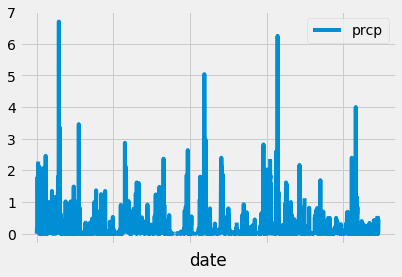

In [74]:
#plot results using teh DataFrame plot method
md_df.plot(kind = "line")
plt.show()

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
md_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
df_station = pd.read_sql(session.query(Station).statement, session.bind)
df.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


#Analysis 

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [79]:
# Design a query to show how many stations are available in this dataset?
station_df = pd.read_sql(session.query(Station).statement, session.bind)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [99]:
station_df.describe()

,id,latitude,longitude,elevation
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,21.393826,-157.867098,60.977778
std,2.738613,0.086442,0.103873,103.465547
min,1.000000,21.271600,-158.011100,0.900000
25%,3.000000,21.333100,-157.975100,7.000000
50%,5.000000,21.393400,-157.837400,14.600000
75%,7.000000,21.451670,-157.802500,32.900000
max,9.000000,21.521300,-157.711390,306.600000


In [218]:
number_of_stations=session.query(func.count(Station.name)).all()
print(f"There are a total of {number_of_stations} stations.")

There are a total of [(9,)] stations.


In [157]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations =engine.execute("SELECT count(station), station FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()
print( "Count of activity per station in decending order:")
print(active_stations)


Count of activity per station in decending order:
[(2772, 'USC00519281'), (2724, 'USC00519397'), (2709, 'USC00513117'), (2669, 'USC00519523'), (2612, 'USC00516128'), (2202, 'USC00514830'), (1979, 'USC00511918'), (1372, 'USC00517948'), (511, 'USC00518838')]


In [158]:
active_stations_df=pd.DataFrame(active_stations, columns={"activity","station"})
active_stations_df

,activity,station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [281]:
most_active_station = active_stations_df.station[0]
print(f"Most active station is {active_stations_df.station[0]} with {active_stations_df.activity[0]} weather observations.")

Most active station is USC00519281 with 2772 weather observations.


In [250]:
tobs=session.query(Measurement.tobs).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.station == "USC00519281").all()

tobs_df=pd.DataFrame(tobs)
tobs_df.head()


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


In [276]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

print(session.query(*sel).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.tobs).all())
        

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs=session.query(Measurement.tobs).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.station == most_active_station).all()

tobs_df=pd.DataFrame(tobs)
tobs_df.head()


Text(0.5, 1.0, 'Temperature Observation Data (tobs)')

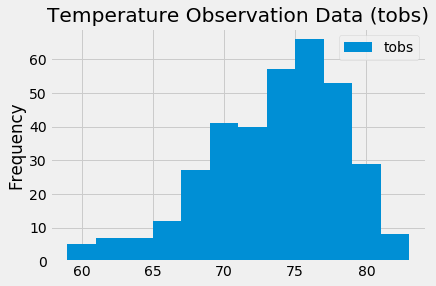

In [288]:
tobs_df["tobs"].plot(kind="hist", bins = 12)
plt.show
plt.legend()
plt.title("Temperature Observation Data (tobs)")

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [290]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [210]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]
